<a href="https://colab.research.google.com/github/shubhamshinde3/Data-Driven-Astronomy/blob/main/Data_Driven_Astronomy_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Using Decision Tree**

In [ ]:
import numpy as np

def get_features_targets(data):
  # complete this function
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  target = data['redshift']
  return features, target
  

if __name__ == "__main__":
  # load the data
  data = np.load('/content/drive/MyDrive/DDA/sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)
    
  # print the shape of the returned arrays
  print(features[:2])
  print(targets[:2])

[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)

# initialize model
dt_reg = DecisionTreeRegressor()

# train the model
dt_reg.fit(X_train, y_train)

# make predictions using the same features
predictions = dt_reg.predict(X_test)

# print out the first 4 predicted redshifts
print(predictions[:4])


[0.4487498  0.1026356  0.05441646 0.01259685]


In [ ]:
import numpy as np
#for validation our model
def median_diff(predicted, actual):
 med_diff = np.median(np.abs(predicted-actual))
 return med_diff

 # call your function to measure the accuracy of the predictions
diff = median_diff(predictions, y_test)

# print the median difference
print("Median difference: {:0.3f}".format(diff))


Median difference: 0.022


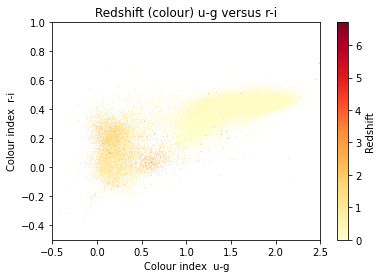

In [ ]:
from matplotlib import pyplot as plt
 # Get a colour map
cmap = plt.get_cmap('YlOrRd')

# Define our colour indexes u-g and r-i
u_g = data['u']- data['g']
r_i = data['r']- data['i']

# Make a redshift array
redshift = data['redshift']

# Create the plot with plt.scatter and plt.colorbar
plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)
    
cb = plt.colorbar(plot)
cb.set_label('Redshift')
    
# Define your axis labels and plot title

plt.xlabel('Colour index  u-g')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) u-g versus r-i')

# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)

plt.show()

In [ ]:
#Imporving The Decision tree 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head()

,u,g,r,i,z,spec_class,redshift,redshift_err
0,19.84132,19.52656,19.46946,19.17955,19.10763,b'QSO',0.539301,0.000065
1,19.86318,18.66298,17.84272,17.38978,17.14313,b'GALAXY',0.164570,0.000012
2,19.97362,18.31421,17.47922,17.07440,16.76174,b'GALAXY',0.041900,0.000022
3,19.05989,17.49459,16.59285,16.09412,15.70741,b'GALAXY',0.044277,0.000011
4,19.45567,18.33084,17.67185,17.30189,17.13650,b'GALAXY',0.041644,0.000018


In [ ]:
def get_features(data):
  # complete this function
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = df['u'] - df['g']
  features[:, 1] = df['g'] - df['r']
  features[:, 2] = df['r'] - df['i']
  features[:, 3] = df['i'] - df['z']
  #target = data['redshift']
  return features

In [ ]:
features = get_features(df)

In [ ]:
targets= df['redshift']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)


In [ ]:
def median_diff(predicted, actual):
 med_diff = np.median(np.abs(predicted-actual))
 return med_diff

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# initialize model
dt_reg = DecisionTreeRegressor()

# train the model
dt_reg.fit(X_train, y_train)

# make predictions using the same features
predictions = dt_reg.predict(X_test)

# print out the first 4 predicted redshifts
print(predictions[:4])

[0.482844   0.1068504  0.05441646 0.01259685]


In [ ]:
def accuracy_by_treedepth(features, targets, depths):
  # initialise arrays or lists to store the accuracies for the below loop
  train_acc=[]
  test_acc=[]

  # loop through depths
  for depth in depths:
    # initialize model with the maximum depth. 
    dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
    dtr.fit(X_train, y_train)

    # get the predictions for the training set and calculate their median_diff
    predictions = dtr.predict(X_train)
    tr_diff = median_diff(predictions, y_train)
    train_acc.append(tr_diff)
    

    # get the predictions for the testing set and calculate their median_diff
    predictions = dtr.predict(X_test)
    ts_diff = median_diff(predictions, y_test)
    test_acc.append(ts_diff)

  # return the accuracies for the training and testing sets
  return train_acc, test_acc

In [ ]:
 # Generate several depths to test
tree_depths = [i for i in range(1, 36, 2)]

train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))



Depth with lowest median difference : 21


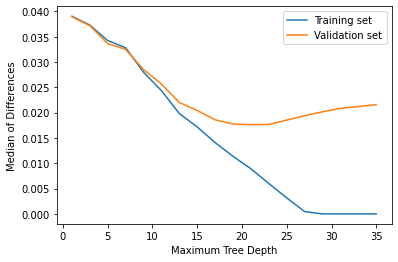

In [ ]:
  # Plot the results
  from matplotlib import pyplot as plt
  train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
  test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
  plt.xlabel("Maximum Tree Depth")
  plt.ylabel("Median of Differences")
  plt.legend()
  plt.show()

In [ ]:
#k flod validation using numpy data not the dataframe

In [ ]:
def cross_validate_model(dtr, features, targets, k):
    kf = KFold(n_splits=k, shuffle=True)
    # initialise a list to collect median_diffs for each iteration of the loop
    # below
    accuracy = []

    for train_set, test_set in kf.split(features):
        train_features = features[train_set]
        test_features = features[test_set]
        train_targets = targets[train_set]
        test_targets = targets[test_set]
        
        # fit the model for the current set
        dtr.fit(train_features, train_targets)
        
        # predict using the model
        prediction = dtr.predict(test_features)
     
        # calculate the median_diff from predicted values and append to
        ra = (median_diff(prediction, test_targets))
        accuracy.append(ra)
 
    # return the list with your median difference values
    return accuracy
  

In [ ]:
# initialize model with a maximum depth of 19
from sklearn.model_selection import KFold
dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
diff = cross_validate_model(dtr, features, targets, 10)

  # Print the values
print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
print('Mean difference: {:.3f}'.format(np.mean(diffs)))


Differences: 0.017, 0.017, 0.018, 0.017, 0.017, 0.017, 0.018, 0.017, 0.017, 0.017
Mean difference: 0.017


In [ ]:
# function to calculate all the median diff
def cross_validate_predictions(dt_reg, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features = features[train_indices]
    test_features = features[test_indices]
    train_targets = targets[train_indices]
    # fit the model for the current set
    dt_reg.fit(train_features, train_targets)
        
    # predict using the model
    predictions = dt_reg.predict(test_features)
        
    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions    


In [ ]:

  # initialize model
dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
predictions = cross_validate_predictions(dtr, features, targets, 10)
  # calculate and print the rmsd as a sanity check
diffs = median_diff(predictions, targets)
print('Median difference: {:.3f}'.format(diffs))

Median difference: 0.017


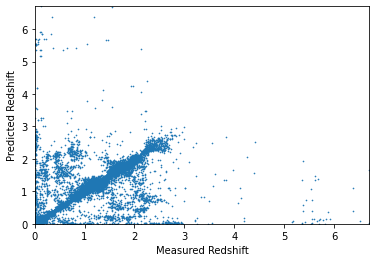

In [ ]:
 # plot the results to see how well our model looks
plt.scatter(targets, predictions, s=0.4)
plt.xlim((0, targets.max()))
plt.ylim((0, predictions.max()))
plt.xlabel('Measured Redshift')
plt.ylabel('Predicted Redshift')
plt.show()

In [ ]:
#

In [ ]:
def split_galaxies_qsos(data):
    # split the data into galaxies and qsos arrays
    galaxies = data[data['spec_class'] == b'GALAXY']
    qsos = data[data['spec_class'] == b'QSO']

    # return the separated galaxies and qsos arrays
    return galaxies, qsos


def cross_validate_median_diff(data):
    features, targets = get_features_targets(data)
    dtr = DecisionTreeRegressor(max_depth=19)
    return np.mean(cross_validate_model(dtr, features, targets, 10))

    # Split the data set into galaxies and QSOs
galaxies, qsos = split_galaxies_qsos(data)

    # Cross validate the model and get the cross-validated median difference
    # The cross_validated_med_diff function is in "written_functions"
galaxy_med_diff = cross_validate_median_diff(galaxies)
qso_med_diff = cross_validate_median_diff(qsos)

    # Print the results
print("Median difference for Galaxies: {:.3f}".format(galaxy_med_diff))
print("Median difference for QSOs: {:.3f}".format(qso_med_diff))

Median difference for Galaxies: 0.017
Median difference for QSOs: 0.017
